<a href="https://colab.research.google.com/github/adikalamaro/repo2/blob/master/final_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.ensemble import RandomForestClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# For the tree visualization
import pydot
from IPython.display import Image
from six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# For validation
from sklearn.model_selection import train_test_split as split

# For the dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif

# For the tree models
from sklearn.metrics import log_loss, fbeta_score, f1_score, recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
plt.style.use('seaborn-darkgrid')

# **Get the data**

In [ ]:
#load dataset

data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# **Data inspection**

In [ ]:
data.shape

(319795, 18)

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

# **Basic Info**

In [ ]:
#Basic info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#numerical stats

data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**! - We can understand that a feature with only 2 uniqe values is probably a column with a boolean meaning, i.e yes or no quesion.**

In [ ]:
# Unique values per column

data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

**! - We can see that there is no null values in our data.**

In [ ]:
# Missing values

data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
data.groupby('HeartDisease').size().sort_values()

HeartDisease
Yes     27373
No     292422
dtype: int64

In [ ]:
data.groupby('HeartDisease').size()

HeartDisease
No     292422
Yes     27373
dtype: int64

# **EDA**

                                                        Correlation

In [ ]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


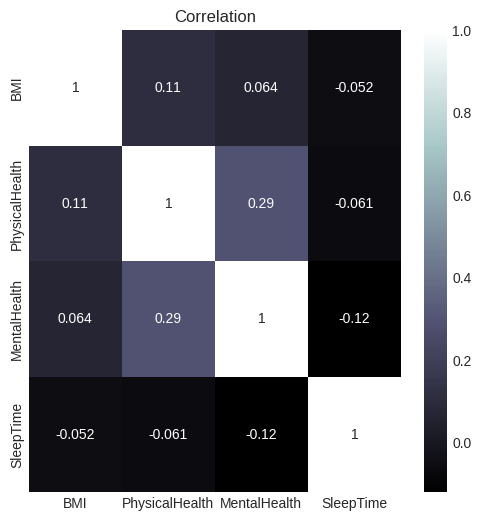

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Correlation')
sns.heatmap(data.corr(),annot=True,cmap='bone')
plt.show()

                                                                  BMI

Body Mass Index (BMI) is a person's weight in kilograms divided by the square of height in meters.

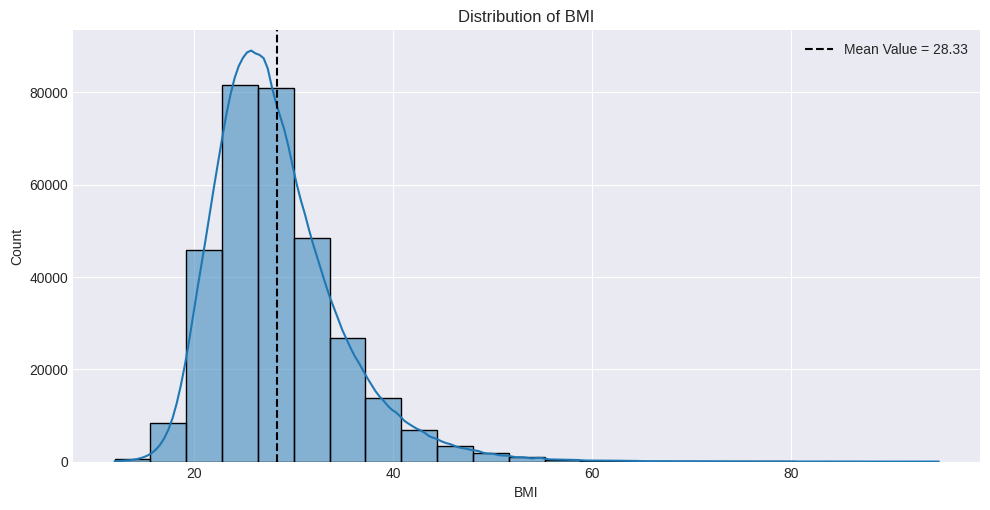

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['BMI'],bins=23,kde=True)
mean_value = data['BMI'].mean()
plt.axvline(x=mean_value, color='black', linestyle='--', label=f'Mean Value = {mean_value:.2f}')
plt.legend()
plt.tight_layout()
plt.title('Distribution of BMI')

plt.show()

**Conclusion - we can see the range of BMI in men and women, and that is very similar to each other. Most of them are between 20 to 40, although there are some extreme values.**

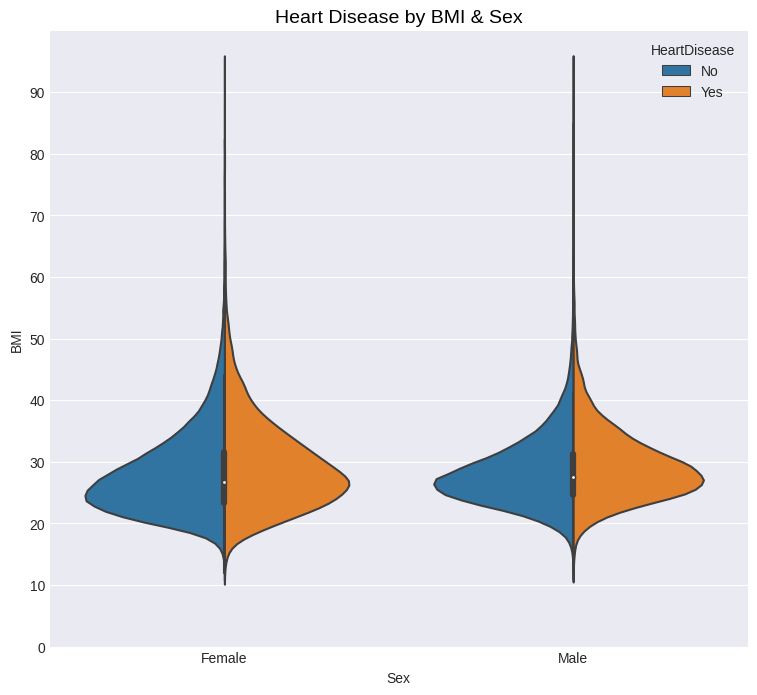

In [ ]:
fig = plt.figure(figsize=(9, 8))
ax = fig.gca()
sns.violinplot(data = data, x = 'Sex',y ='BMI', hue= 'HeartDisease', split=True)
ax.set_yticks(range(0,100,10))
ax.set_ylim(0,100)
plt.title(label='Heart Disease by BMI & Sex',  fontsize=14, color = 'black')
plt.show()

**Conclusion -** The viloin graph show the value distribution between men and women, but also the Heart disease affect on the BMI. - We can see both graphs are almost identical and that **heart disease does not affect the BMI value in both men and women.**

                                                                  Smoking

In [ ]:
smokers = data.groupby(['Smoking'])['BMI'].size()
smokers

Smoking
No     187887
Yes    131908
Name: BMI, dtype: int64

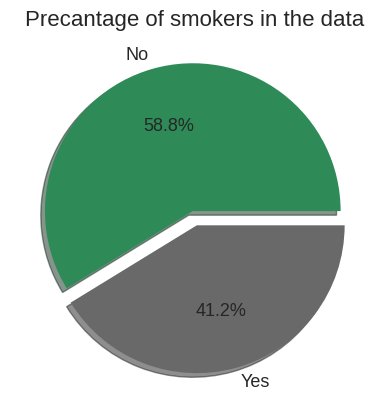

<Figure size 600x600 with 0 Axes>

In [ ]:
# Defining colors for the pie chart
colors = ['seagreen', 'dimgrey']

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)

smokers.plot(kind='pie',
               autopct='%1.1f%%' ,colors=colors,
               explode=explode, fontsize=13,
               shadow=True)

plt.title(label='Precantage of smokers in the data', fontsize=16)
plt.ylabel('')
plt.figure(figsize=(6,6))
plt.tight_layout()
plt.show()


**Conclusion -** most of the people in our data don't smoke, although 41% are smokers.

In [ ]:
# Checking the heart disease rate of the two groups - Smokers and not smokers

heart = data[data['HeartDisease']=='Yes']
sum_heart = heart.groupby('Smoking').size()
sum_heart

Smoking
No     11336
Yes    16037
dtype: int64

In [ ]:
# Checking the total amount of each of the two groups

smokers = data.groupby(['Smoking'])['BMI'].size()
smokers

Smoking
No     187887
Yes    131908
Name: BMI, dtype: int64

In [ ]:
# Calculatig the heart disease percentage among smokers and not

res = sum_heart/smokers
res

Smoking
No     0.060334
Yes    0.121577
dtype: float64

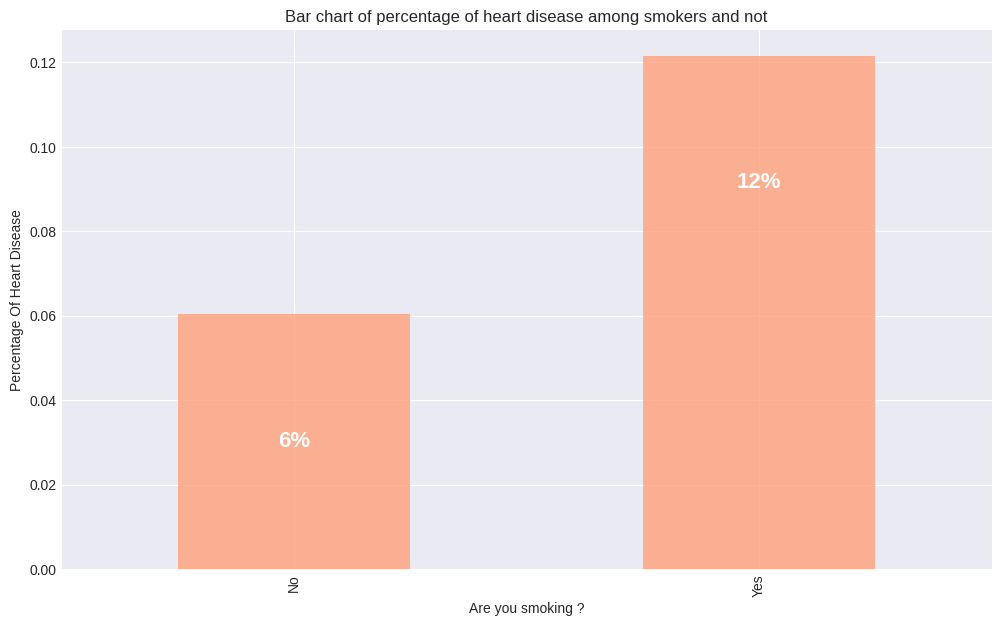

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_title('Percentage of heart probelms in smokers')
res.plot.bar(figsize=(12,7), color='lightsalmon',alpha=0.8)
ax.set_title('Bar chart of percentage of heart disease among smokers and not')
ax.set_ylabel('Percentage Of Heart Disease')
ax.set_xlabel('Are you smoking ?')
ax.legend('')

#Labels for each bar
for i in range(len(res.values)):
  ax.text(i, res.values[i] -0.03 , str(int(float(res.values[i])*100))+'%'\
          , ha='center' , va='center',color='white',fontsize=16, weight='bold')

plt.show()

**Conclusion - We can see that the heart disease rate among smokera is doubled in compare to the other group**. From that we can conclude that smoking is a habit that increase the chances of heart disease.

                                                           Alcohol Drinking

In [ ]:
#Slicing the group from the data that drinks alcohol
heart = data[data['HeartDisease']=='Yes']
sum_heart = heart.groupby('AlcoholDrinking').size()
alcohol = data[data['AlcoholDrinking']=='Yes']

# feature represnts the amounts of the two options Yes & No
drinking = data.groupby('AlcoholDrinking')['MentalHealth'].size()

# Calculating the percentage of adoption from the total amount
p_drink = (sum_heart/drinking)*100
p_drink

AlcoholDrinking
No     8.802153
Yes    5.239473
dtype: float64

                                                           Astmha



In [ ]:
# Checking the heart disease rate of the two groups in the col

total_asthma = heart.groupby('Asthma').size()


# feature represnts the amounts of the two options Yes & No
asthma = data.groupby('Asthma').size()


# Calculating the percentage of heart disease of the total amount
p_asthma = (total_asthma/asthma)*100
p_asthma

Asthma
No      8.103336
Yes    11.506344
dtype: float64

                                                            difficulty walking

In [ ]:
  # Checking the heart disease rate of the two groups in the col
total_dw = heart.groupby('DiffWalking').size()


  # feature represnts the amounts of the two options Yes & No
dw = data.groupby('DiffWalking').size()

  # Calculating the percentage of heart disease of the total amount
p_dw = (total_dw/dw)*100
p_dw

DiffWalking
No      6.298455
Yes    22.580500
dtype: float64

                                                                        
                                                                         GenHealth

In [ ]:
# Checking the heart disease rate of the two groups in the col
total_gh= heart.groupby('GenHealth').size()

# feature represnts the amounts of the two options Yes & No
gh = data.groupby('GenHealth')['HeartDisease'].size()


  # Calculating the percentage of heart disease of the total amount
p_gh = (total_gh/gh)*100

In [ ]:
p_gh

GenHealth
Excellent     2.244098
Fair         20.428526
Good         10.263183
Poor         34.103995
Very good     4.726062
dtype: float64

                                                                    
                                                                     KidneyDisease

In [ ]:
# Checking the heart disease rate of the two groups in the col
total_kd= heart.groupby('KidneyDisease').size()

# feature represnts the amounts of the two options Yes & No
kd= data.groupby('KidneyDisease').size()

# Calculating the percentage of heart disease of the total amount
p_kd = (total_kd/kd)*100
p_kd

KidneyDisease
No      7.765181
Yes    29.331862
dtype: float64

       
                                                                      Skin Cancer

In [ ]:
# Checking the heart disease rate of the two groups in the col
total_sc = heart.groupby('SkinCancer').size()

# feature represnts the amounts of the two options Yes & No
sc = data.groupby('SkinCancer').size()

# Calculating the percentage of heart disease of the total amount
p_sc = (total_sc/sc)*100

In [ ]:
p_sc

SkinCancer
No      7.722363
Yes    16.700761
dtype: float64

                                                                          Stroke


In [ ]:
# Checking the heart disease rate of the two groups in the col
total_stroke = heart.groupby('Stroke').size()
stroke
# feature represnts the amounts of the two options Yes & No
stroke = data.groupby('Stroke').size()


  # Calculating the percentage of heart disease of the total amount
p_stroke = (total_stroke/stroke)*100

                                                            Diabetic

In [ ]:
# Checking the heart disease rate of the two groups - Smokers and not smokers

total_Diabetic = heart.groupby('Diabetic').size()

Diabetic = data.groupby('Diabetic').size()

p_Diabetic = (total_Diabetic/Diabetic)*100


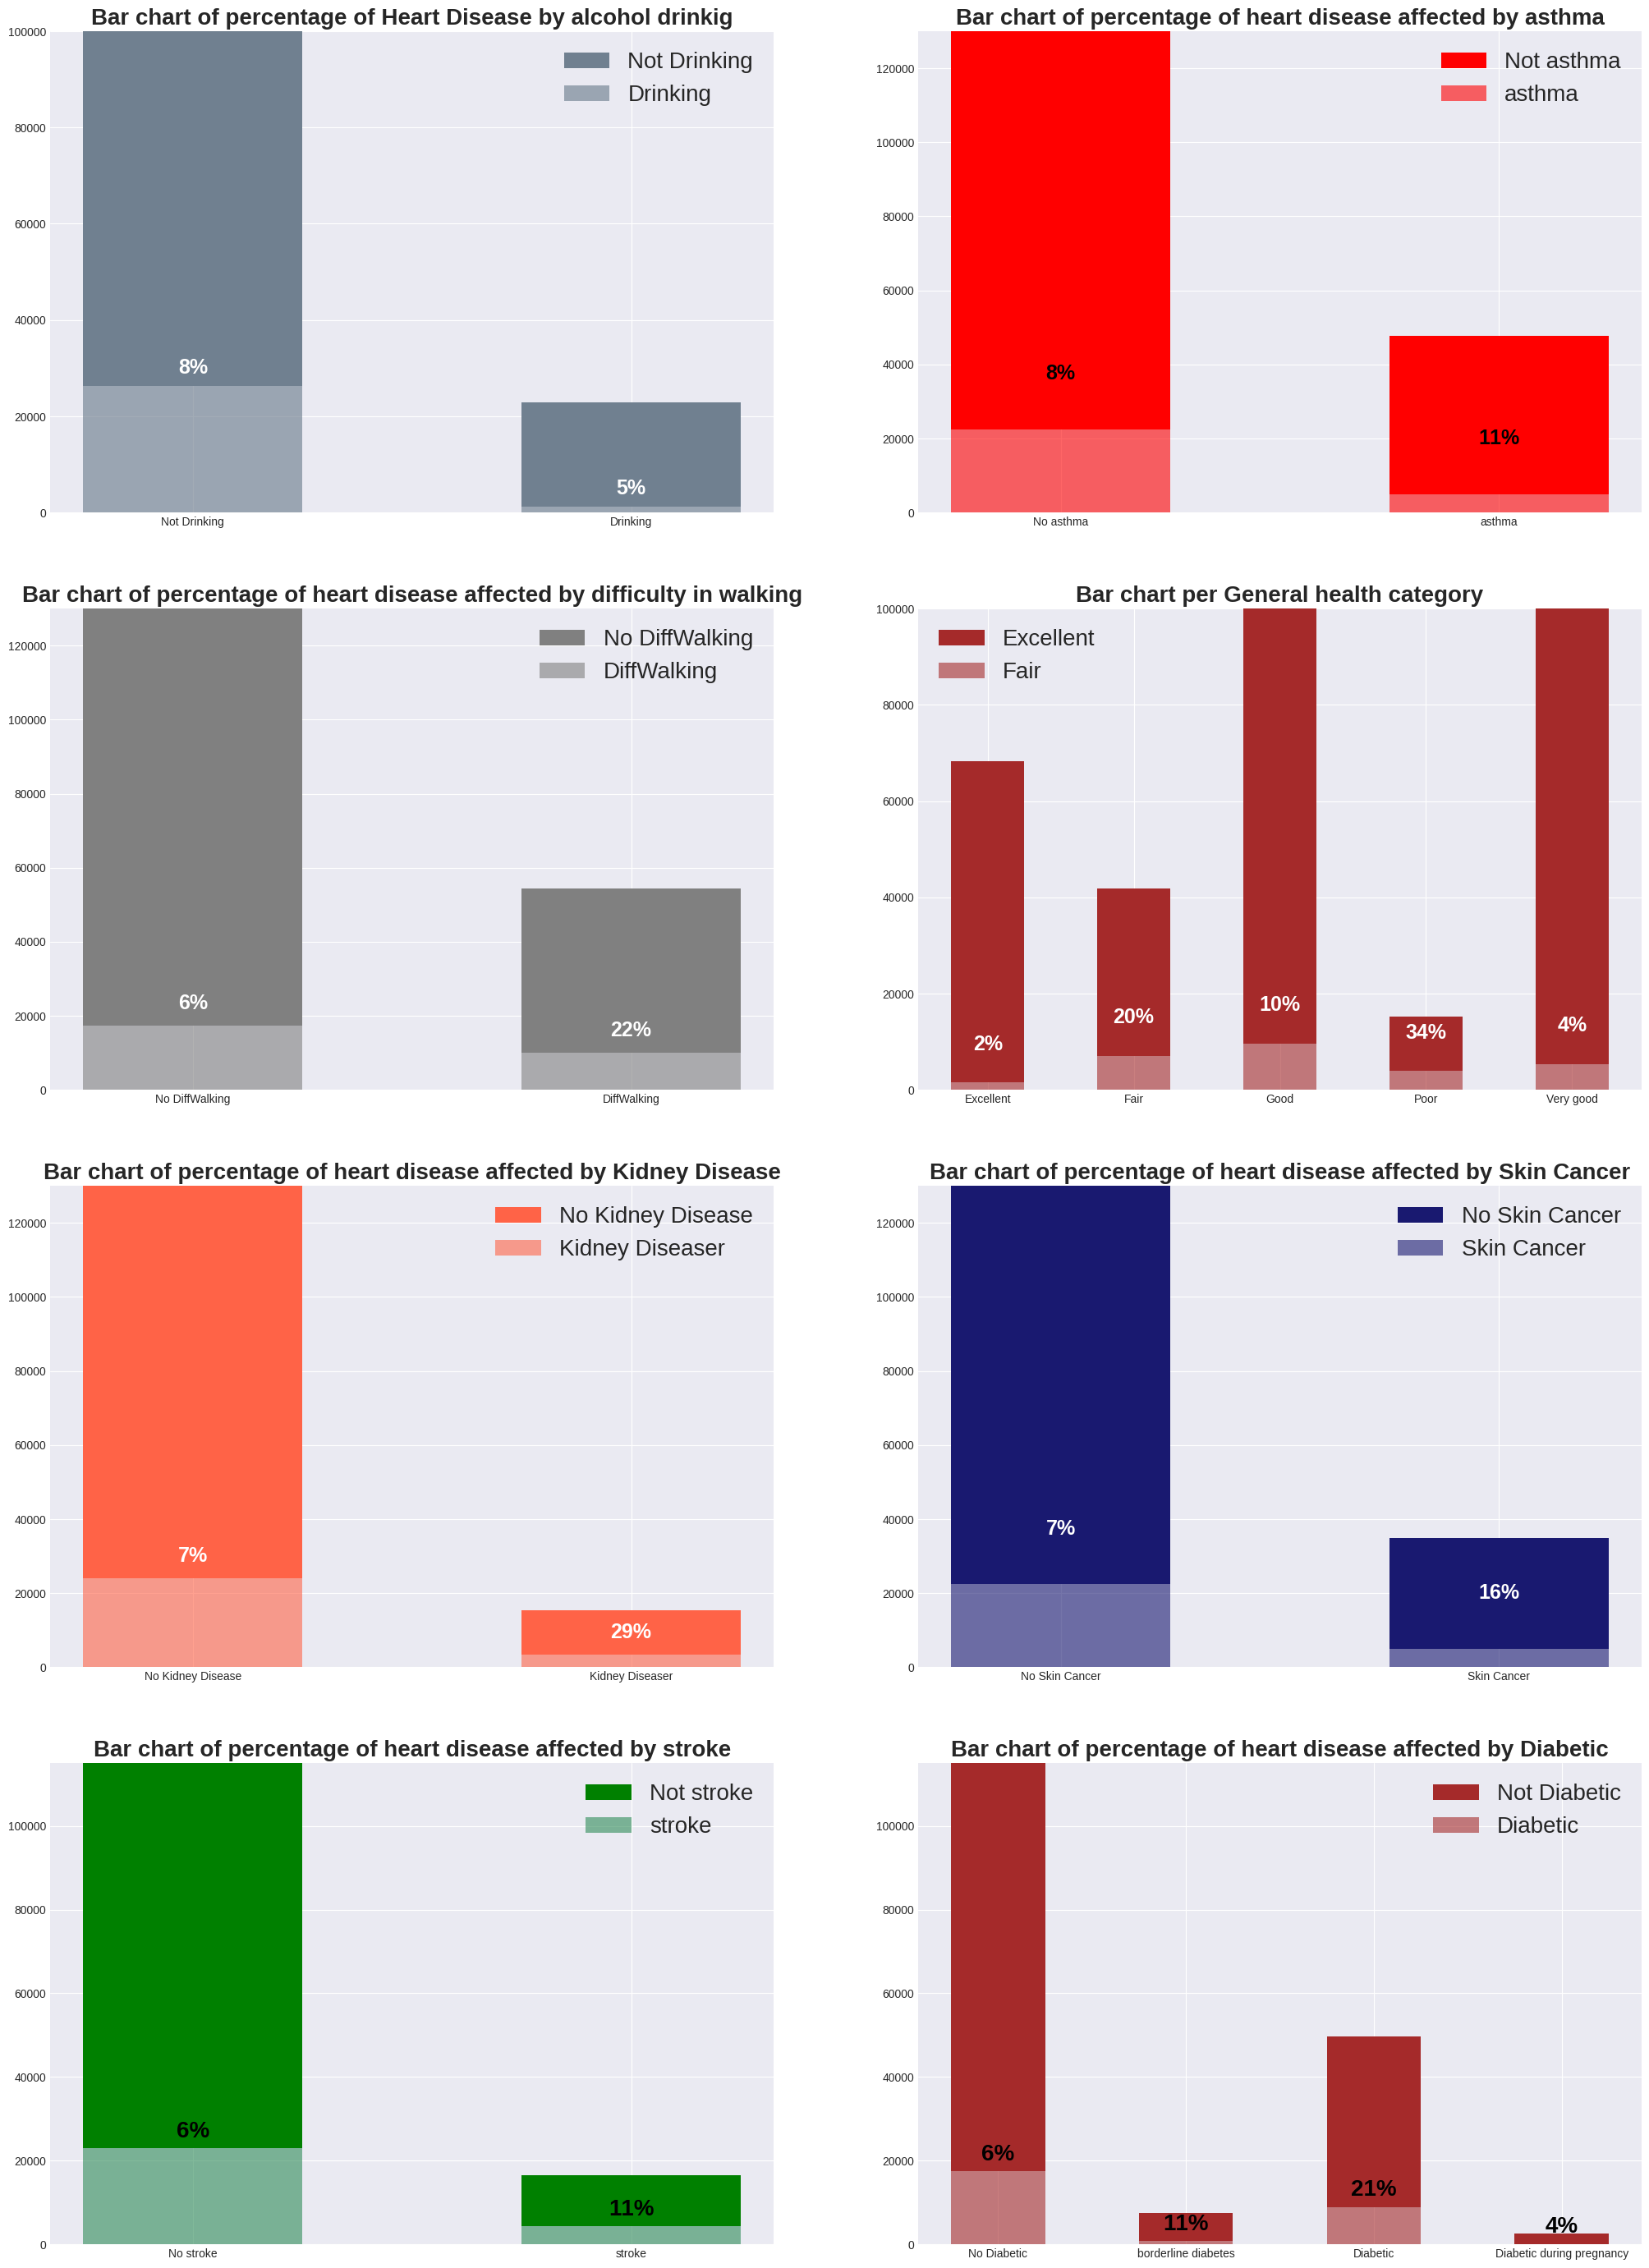

In [ ]:
fig = plt.figure(figsize=(25, 35))

                                     #Graph Of Alcohol Drinking
plt.subplot(4,2,1)
ax = fig.gca()

#The Stack Bar Graph
ax.bar(x=drinking.index, height=drinking.values, align='center', color='slategrey',\
       tick_label=['Not Drinking','Drinking'],width=0.5, bottom=sum_heart.values)
ax.bar(x=sum_heart.index, height=sum_heart.values, align='center', color='slategrey', width=0.5, alpha=0.65)

#Titles & Labeles
ax.legend(['Not Drinking','Drinking'],fontsize=20)
ax.set_title('Bar chart of percentage of Heart Disease by alcohol drinkig',fontsize=20, weight='bold')
ax.set_ylim(0,100000)

#Labels for each bar
for i in range(len(sum_heart.values)):
  ax.text(i, sum_heart.values[i] + 3900 , str(int(p_drink[i]))+'%'\
          , ha='center' , va='center',color='white',fontsize=18, weight='bold')

                                     #Graph Of Asthma

plt.subplot(4,2,2)
ax = fig.gca()

#The Stack Bar Graph
ax.bar(x=asthma.index, height=asthma.values, align='center', color='red',\
        tick_label=['No asthma','asthma'],width=0.5, bottom=total_asthma.values)
ax.bar(x=total_asthma.index, height=total_asthma.values, align='center', color='red', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['Not asthma','asthma'],fontsize=20)
ax.set_title('Bar chart of percentage of heart disease affected by asthma',fontsize=20, weight='bold')
ax.set_ylim(0,130000)

#Labels for each bar
for i in range(len(total_asthma.values)):
  ax.text(i, total_asthma.values[i] + 15000 , str(int(p_asthma[i]))+'%'\
       , ha='center' , va='center',color='black',fontsize=18, weight='bold')


                                     #Graph Of DiffWalking

plt.subplot(4,2,3)
ax = fig.gca()
#The Stack Bar Graph
ax.bar(x=dw.index, height=dw.values, align='center', color='grey',\
      tick_label=['No DiffWalking','DiffWalking'],width=0.5, bottom=total_dw.values)
ax.bar(x=total_dw.index, height=total_dw.values, align='center', color='grey', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['No DiffWalking','DiffWalking'],fontsize=20)
ax.set_title('Bar chart of percentage of heart disease affected by difficulty in walking',fontsize=20, weight='bold')
ax.set_ylim(0,130000)


#Labels for each bar
for i in range(len(total_dw.values)):
  ax.text(i, total_dw.values[i] + 6000 , str(int(p_dw[i]))+'%'\
        , ha='center' , va='center',color='white',fontsize=18, weight='bold')


                                     #Graph Of General Health

plt.subplot(4,2,4)
ax = fig.gca()

#The Stack Bar Graph
ax.bar(x=gh.index, height=gh.values, align='center', color='brown',\
       tick_label=['Excellent','Fair','Good','Poor','Very good'],width=0.5, bottom=total_gh.values)

ax.bar(x=gh.index, height=total_gh.values, align='center', color='brown', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['Excellent','Fair','Good','Poor','Very good'],fontsize=20)
ax.set_title('Bar chart per General health category',fontsize=20, weight='bold')
ax.set_ylim(0,100000)

#Labels for each bar
for i in range(len(total_gh.values)):
  ax.text(i, total_gh.values[i] + 8000 , str(int(p_gh[i]))+'%'\
          , ha='center' , va='center',color='white',fontsize=18, weight='bold')


                                     #Graph Of Kidney Disease

plt.subplot(4,2,5)
ax = fig.gca()
#The Stack Bar Graph
ax.bar(x=kd.index, height=kd.values, align='center', color='tomato',\
    tick_label=['No Kidney Disease','Kidney Diseaser'],width=0.5, bottom=total_kd.values)

ax.bar(x=total_kd.index, height=total_kd.values, align='center', color='tomato', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['No Kidney Disease','Kidney Diseaser'],fontsize=20)
ax.set_title('Bar chart of percentage of heart disease affected by Kidney Disease',fontsize=20, weight='bold')
ax.set_ylim(0,130000)

#Labels for each bar
for i in range(len(total_kd.values)):
  ax.text(i, total_kd.values[i] + 6000 , str(int(p_kd[i]))+'%'\
       , ha='center' , va='center',color='white',fontsize=18, weight='bold')

                                     #Graph Of Skin Cancer

plt.subplot(4,2,6)
ax = fig.gca()
#The Stack Bar Graph
ax.bar(x=sc.index, height=sc.values, align='center', color='midnightblue',\
      tick_label=['No Skin Cancer','Skin Cancer'],width=0.5, bottom=total_sc.values)

ax.bar(x=total_sc.index, height=total_sc.values, align='center', color='midnightblue', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['No Skin Cancer','Skin Cancer'],fontsize=20)
ax.set_title('Bar chart of percentage of heart disease affected by Skin Cancer',fontsize=20, weight='bold')
ax.set_ylim(0,130000)


#Labels for each bar
for i in range(len(total_sc.values)):
  ax.text(i, total_sc.values[i] + 15000 , str(int(p_sc[i]))+'%'\
          , ha='center' , va='center',color='white',fontsize=18, weight='bold')

                                     #Graph Of Stroke
plt.subplot(4,2,7)
ax = fig.gca()
#The Stack Bar Graph
ax.bar(x=stroke.index, height=stroke.values, align='center', color='green',\
       tick_label=['No stroke','stroke'],width=0.5, bottom=total_stroke.values)

ax.bar(x=total_stroke.index, height=total_stroke.values, align='center', color='seagreen', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['Not stroke','stroke'],fontsize=20)
ax.set_title('Bar chart of percentage of heart disease affected by stroke',fontsize=20, weight='bold')
ax.set_ylim(0,115000)

#Labels for each bar
for i in range(len(total_stroke.values)):
  ax.text(i, total_stroke.values[i] + 4000 , str(int(p_Diabetic[i]))+'%'\
          , ha='center' , va='center',color='black',fontsize=20, weight='bold')

                                     #Graph Of Diabetic

plt.subplot(4,2,8)
ax = fig.gca()
#The Stack Bar Graph
ax.bar(x=Diabetic.index, height=Diabetic.values, align='center', color='brown',\
       tick_label=['No Diabetic','borderline diabetes','Diabetic','Diabetic during pregnancy'],width=0.5, bottom=total_Diabetic.values)

ax.bar(x=total_Diabetic.index, height=total_Diabetic.values, align='center', color='brown', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['Not Diabetic','Diabetic','Diabetic','Diabetic'],fontsize=20)
ax.set_title('Bar chart of percentage of heart disease affected by Diabetic',fontsize=20, weight='bold')
ax.set_ylim(0,115000)

#Labels for each bar
for i in range(len(total_Diabetic.values)):
  ax.text(i, total_Diabetic.values[i] + 4000 , str(int(p_Diabetic[i]))+'%'\
          , ha='center' , va='center',color='black',fontsize=20, weight='bold')

plt.show()

**Conclusions :**

**! - Alcohol Drinking** -  **Suprisingly, from the graph we can see that Alcohol drinking is not increasing the heart disease rate**, but we can see the rate is even lower the group that don't consume alchol.

**! - Asthma is not a feature with high affection for getting heart disease**, as the disease rate among the two groups is alomst equale.

**! - GenHealth - There is a reasonable correlation between the general health category to the heart disease rate.** As people with excellent health condition have 2% disease rate in compare to poor condition with 34% rate.

**! - KidneyDisease -  Kidney Disease is a feature that indicates to heart disease**, as 29% of people the suffer from Kidney Disease also have heart disease.

**! - Skin Cancer -  Skin Cancer is a feature that indicates to heart disease**, as 16% of people the suffer from Kidney Disease also have heart disease, more than doubled to the rate in the other group.

**! - Stroke -  Stroke is a feature that indicates to heart disease**, as 36% of people that suffer from stroke also have heart disease.

**! - Diabetic** - people with Diabtic tend to have more heart disease in compare to people with no diabetic.*

**1 - difficulty walking - Here we can see that having a difficulty in walking it is a great indication to heart disease**, as 22% of people that have the simptome suffer from heart disease.

                                                                Sleep time

In [ ]:
heart = data[data['HeartDisease']=='Yes']

In [ ]:
sleep = heart.groupby('SleepTime')['HeartDisease'].size()

total=data.groupby('SleepTime').size()
p = (sleep/total)*100
total

SleepTime
1.0       551
2.0       788
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
14.0      243
15.0      189
16.0      236
17.0       21
18.0      102
19.0        3
20.0       64
21.0        2
22.0        9
23.0        3
24.0       30
dtype: int64

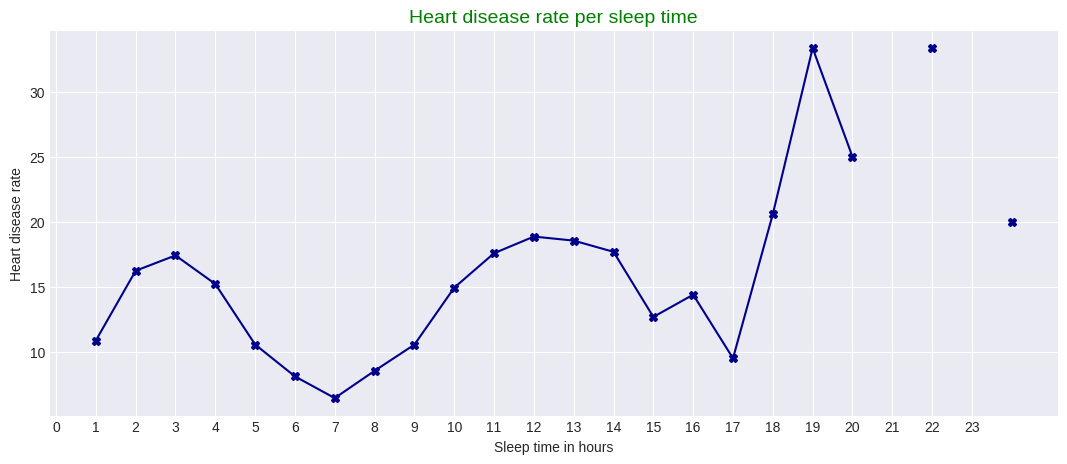

In [ ]:
hours = pd.Series(list(range(1,25)))
fig, ax = plt.subplots(figsize=(13, 5))
plt.plot(hours, p.values, color='darkblue', marker="X")
ax.grid(True)
ax.set_xticks(range(0,24,1))
ax.set_ylabel('Heart disease rate')
ax.set_xlabel('Sleep time in hours')
ax.legend(labels='')
plt.title(label='Heart disease rate per sleep time',  fontsize=14, color = 'g')
plt.show()

**Conclusion -** We can see there is a correlation between the amount of each sleep time in the data to the heart disease cases, therefore, there is no affection between to the parameters.

                                                                        Age

In [ ]:
heart = data[data['HeartDisease']=='Yes']

In [ ]:
age = heart.groupby(['AgeCategory','Sex'])['HeartDisease'].size()
age

AgeCategory  Sex   
18-24        Female      50
             Male        80
25-29        Female      66
             Male        67
30-34        Female      99
             Male       127
35-39        Female     148
             Male       148
40-44        Female     243
             Male       243
45-49        Female     320
             Male       424
50-54        Female     596
             Male       787
55-59        Female     908
             Male      1294
60-64        Female    1257
             Male      2070
65-69        Female    1467
             Male      2634
70-74        Female    1810
             Male      3037
75-79        Female    1642
             Male      2407
80 or older  Female    2628
             Male      2821
Name: HeartDisease, dtype: int64

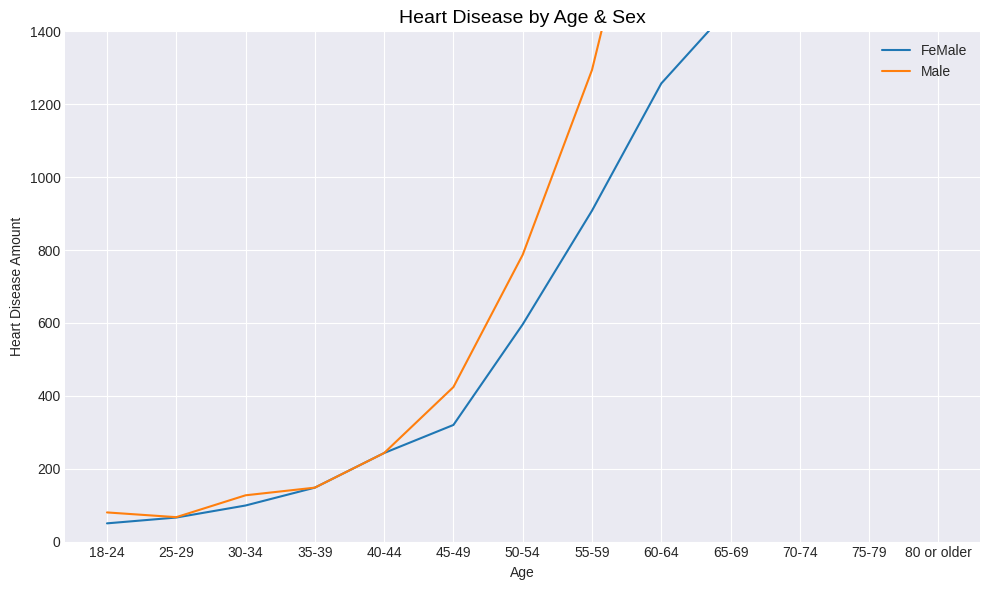

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(age.unstack().fillna(0))
plt.ylim(0, 1400)
plt.ylabel('Heart Disease Amount')
plt.xlabel('Age')
plt.legend(labels=['FeMale','Male'])
plt.title(label='Heart Disease by Age & Sex',  fontsize=14, color = 'black')
plt.tight_layout()
plt.show()

**Conclusion - As expected the heart disease amount is behaving in a exponential way, as the age is higher there are more heart disease cases.** We also can see that man have higer increase in younger age in comparssion to women.

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


                                                                        Mental Health

In [ ]:
x = data.loc[data['HeartDisease']=='Yes']['MentalHealth']
y = data.loc[data['HeartDisease']=='No']['MentalHealth']

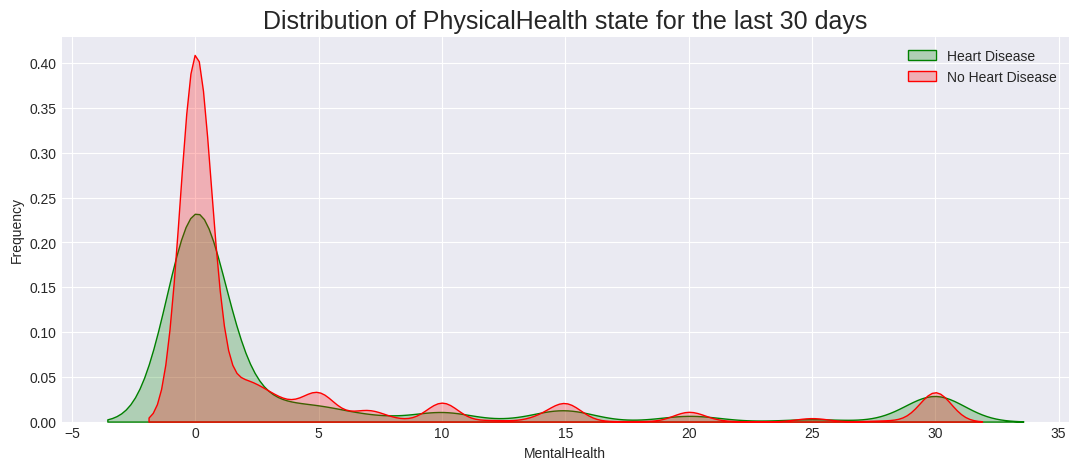

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(x, fill = True , color = "Green")
sns.kdeplot(y, fill = True , color = "red")
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(['Heart Disease','No Heart Disease'])
plt.show()

                                                                        PhysicalHealth

In [ ]:
x = data.loc[data['HeartDisease']=='Yes']['PhysicalHealth']
y = data.loc[data['HeartDisease']=='No']['PhysicalHealth']

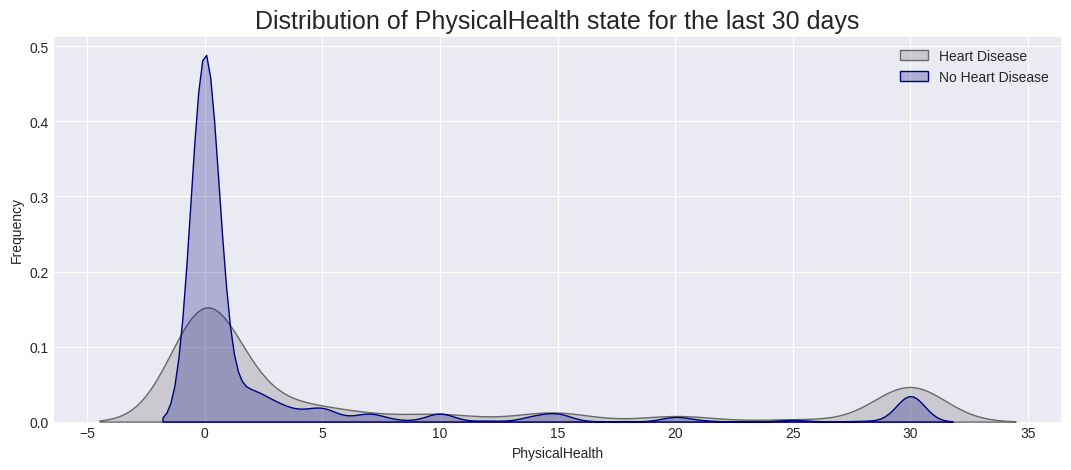

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(x, fill = True , color = "dimgrey")
sns.kdeplot(y, fill = True , color = "navy")
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(['Heart Disease','No Heart Disease'])
plt.show()

**Conclusion -** we can see to frequency of No-heart-disease is much higer on the lower values, while as the value day increase the frequency balanced to equale until the heart disease is higer.

                                                                        Race

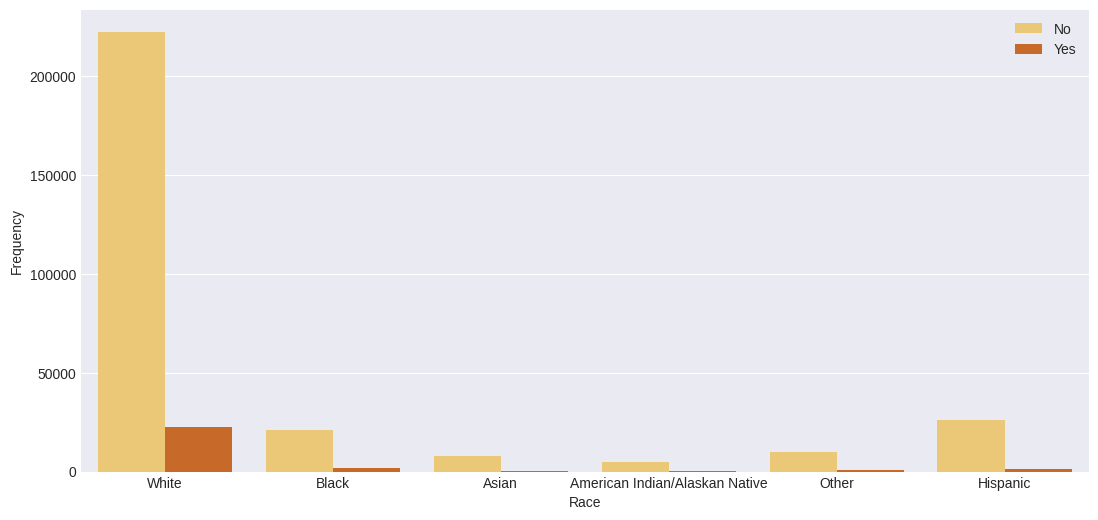

In [ ]:
plt.figure(figsize = (13,6))
sns.countplot( x= data['Race'], hue = 'HeartDisease', data = data, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Checking the heart disease rate of the two groups - Smokers and not smokers

heart = data[data['HeartDisease']=='Yes']
sick = heart.groupby('Race').size()
sick

Race
American Indian/Alaskan Native      542
Asian                               266
Black                              1729
Hispanic                           1443
Other                               886
White                             22507
dtype: int64

In [ ]:
race = data.groupby('Race')['HeartDisease'].size().sort_values()
race

Race
American Indian/Alaskan Native      5202
Asian                               8068
Other                              10928
Black                              22939
Hispanic                           27446
White                             245212
Name: HeartDisease, dtype: int64

In [ ]:
p = (sick/race)*100
p

Race
American Indian/Alaskan Native    10.419070
Asian                              3.296976
Black                              7.537382
Hispanic                           5.257597
Other                              8.107613
White                              9.178588
dtype: float64

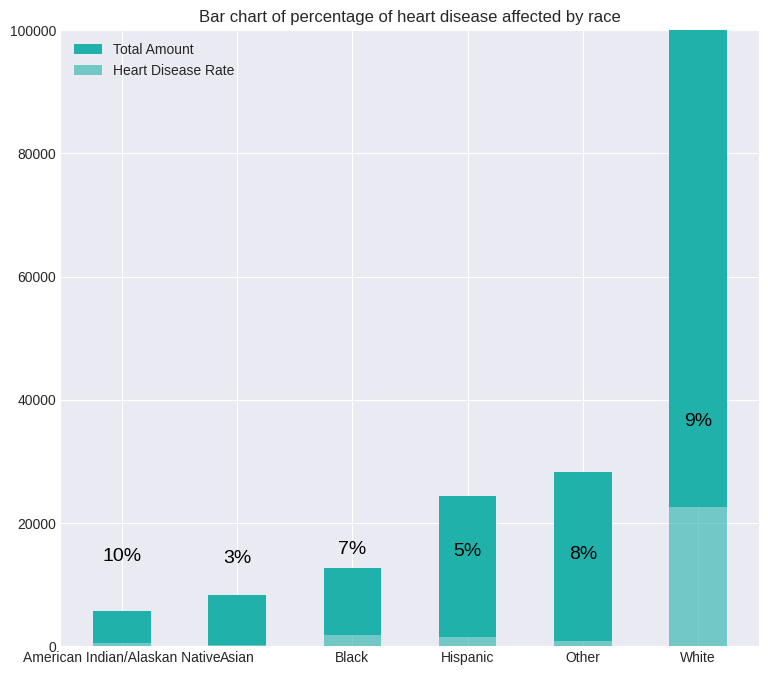

In [ ]:
fig = plt.figure(figsize=(9, 8))
ax = fig.gca()

#The Stack Bar Graph
ax.bar(x=race.index, height=race.values, align='center', color='lightseagreen',\
       tick_label=['American Indian/Alaskan Native','Asian','Black','Hispanic','Other','White'],width=0.5, bottom=sick.values)

ax.bar(x=race.index, height=sick.values, align='center', color='lightseagreen', width=0.5, alpha=0.6)

#Titles & Labeles
ax.legend(['American Indian/Alaskan Native','Asian','Black','Hispanic','Other','White'])
ax.set_title('Bar chart of percentage of heart disease affected by race')
ax.set_ylim(0,100000)
ax.legend(['Total Amount','Heart Disease Rate'])

#Labels for each bar
for i in range(len(sick.values)):
  ax.text(i, sick.values[i] + 14000 , str(int(p[i]))+'%'\
          , ha='center' , va='center',color='black',fontsize=14)

plt.show()

**Conclusion -** We can see that there are two group with higer heart disease rate - White and american indian and alaskan native.
On the other hand, among Asian people there is only 3% of heart disease, which is the lowest among all races.

                                                                Heart Disease Rate

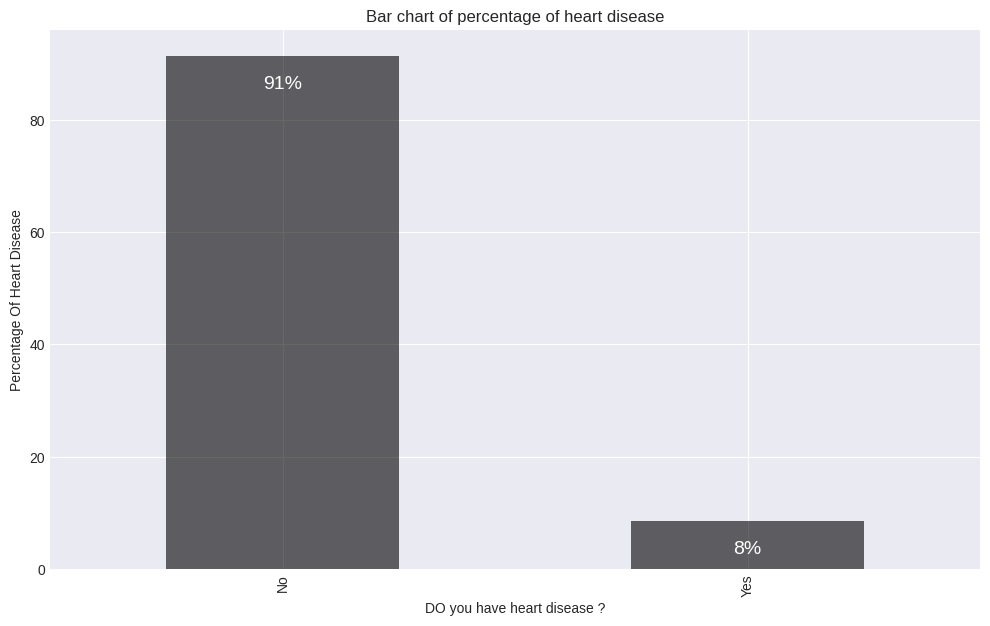

In [ ]:
fig = fig = plt.figure(figsize=(5, 4))
ax = fig.gca()
imb=data.groupby('HeartDisease').size()
total= data.shape[0]
p = (imb/total)*100

ax.set_title('Percentage of heart Disease')
p.plot.bar(figsize=(12,7), color='black',alpha=0.6)
ax.set_title('Bar chart of percentage of heart disease')
ax.set_ylabel('Percentage Of Heart Disease')
ax.set_xlabel('DO you have heart disease ?')
ax.legend('')

#Labels for each bar
for i in range(len(p.values)):
  ax.text(i, p.values[i] - 5, str(int(p[i]))+'%'\
          , ha='center' , va='center',color='white',fontsize=14)

plt.show()

**Conclusion - Our Data is imbalanced data !**

# **Splitting the Data**

In [ ]:
# Splitting the target feature

X = data.drop('HeartDisease',axis=1)
y =data.HeartDisease

In [ ]:
# Splitting the data to train and test

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=1)

# **Cleaning**

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Missing values**

In [ ]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


There are no Null values in our data !

**Outliers**

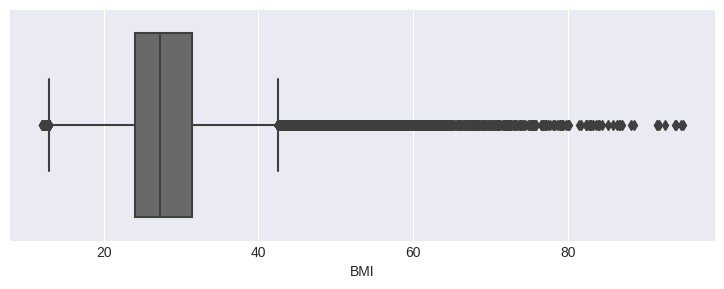

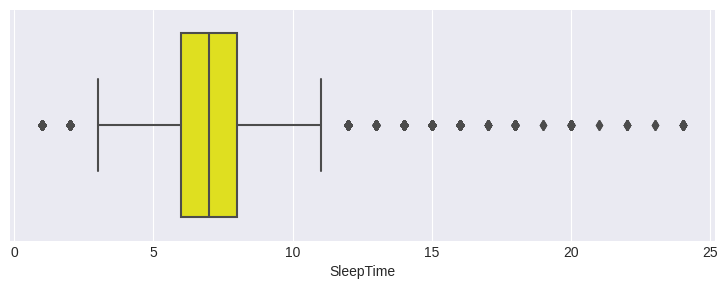

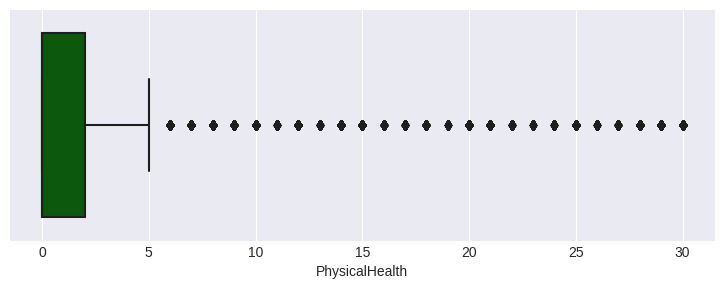

In [ ]:
fig = plt.figure(figsize=[20,3])
plt.subplot(1,2,1)
sns.boxplot(x='BMI', data=data,color='dimgrey')


fig = plt.figure(figsize=[20,3])
plt.subplot(1,2,2)
sns.boxplot(x='SleepTime', data=data,color='yellow')

fig = plt.figure(figsize=[20,3])
plt.subplot(1,2,2)
sns.boxplot(x='PhysicalHealth', data=data,color='darkgreen')


plt.show()

In our data there are some outliers, as we can see in the boxplots,
but in our opinion there are still valueable for our estimator

# **Transformers**

We decided to apply couple of tramsformers after spliting and before the pipeline, in mind that we apply on both train and test sets.

In [ ]:
#Age feature Transformer

X_train['AgeCategory']= X_train['AgeCategory'].apply(lambda x : x.split('-')[0])
X_train['AgeCategory'].replace('80 or older', 80, inplace=True)
X_train['AgeCategory'] = X_train['AgeCategory'].apply(lambda x : int(x))

#Age feature Transformer

X_test['AgeCategory']= X_test['AgeCategory'].apply(lambda x : x.split('-')[0])
X_test['AgeCategory'].replace('80 or older', 80, inplace=True)
X_test['AgeCategory'] = X_test['AgeCategory'].apply(lambda x : int(x))

In [ ]:
# Race , GenHealth , Diabetic Features - Categorial Transformer

ohe = OneHotEncoder(sparse=False).fit(X_train[['Race','GenHealth','Diabetic']])
t = ohe.transform(X_train[['Race','GenHealth','Diabetic']])
t = pd.DataFrame(t,columns=ohe.get_feature_names_out(),index=X_train.index.tolist())
X_train = pd.concat([X_train,t],axis=1)
X_train = X_train.drop(labels=['GenHealth','Diabetic','Race'], axis=1)
X_train.head(3)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
273582,43.40,No,No,No,2.0,5.0,No,Male,50,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
54829,36.85,Yes,No,No,20.0,0.0,Yes,Female,70,No,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1482,35.70,No,No,No,25.0,25.0,No,Female,50,No,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Race , GenHealth , Diabetic Features - Categorial Transformer

t_test= ohe.transform(X_test[['Race','GenHealth','Diabetic']])
t_test= pd.DataFrame(t_test,columns=ohe.get_feature_names_out(),index=X_test.index.tolist())
X_test = pd.concat([X_test,t_test],axis=1)
X_test = X_test.drop(labels=['GenHealth','Diabetic','Race'], axis=1)
X_test.head(3)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
301988,24.30,No,No,No,0.0,15.0,No,Female,40,Yes,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
223127,23.78,Yes,No,Yes,0.0,0.0,Yes,Female,80,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
216797,20.60,Yes,No,No,0.0,0.0,No,Female,70,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Transformer for target to be numerical - binary transformer

y_train = y_train.apply(lambda x : 1 if x=='Yes' else 0)
y_test = y_test.apply(lambda x : 1 if x=='Yes' else 0)

The transformers above we created for dealing with categorial features and to combine it within the Pipeline we want to creat.

In [ ]:
# Custom Transformer
class cat_group(BaseEstimator, TransformerMixin):
    def __init__(self,dec):
        self.dec=dec

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_new = X.copy()
        X_new = X.applymap(self.dec.get)
        return X_new


In [ ]:
# Custom Transformer
class cols_selector(BaseEstimator, TransformerMixin):
    def __init__(self,cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_new = X.copy()
        X_new = X[self.cols]
        return X_new

In [ ]:
d = {'Yes' or 'Male':1, 'No' or 'Female':0}

# **Pipeline & Modeling**

**Pipeline steps**

In [ ]:
p1 = Pipeline([('sleep',cols_selector(['AgeCategory'])), ('MAS', MaxAbsScaler())])
p2 = Pipeline([('BMI',cols_selector(['BMI'])), ('rbs', RobustScaler())])
p3 = Pipeline([('numeric',cols_selector(['PhysicalHealth','MentalHealth','SleepTime'])), ('mms', MinMaxScaler())])
p4 = Pipeline([('cat',cols_selector(['Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'\
                   ,'Asthma','KidneyDisease','SkinCancer'])), ('cattrans', cat_group(d))])

mapper = FeatureUnion([('p1', p1),('p2',p2),('p3',p3),('p4',p4)])

**Random Forest with fbeta score**

In [ ]:
# Instance of the estimator

classifier = RandomForestClassifier(class_weight='balanced')

In [ ]:
# Choosing croos validation technique

my_cv=StratifiedShuffleSplit(n_splits=3, train_size=0.7,test_size=0.3)

In [ ]:
# we define the f-beta score

fbeta_scorer = make_scorer(fbeta_score, beta=0.7)

In [ ]:
כpipeline = Pipeline([("mapper", mapper),
                     ("pipeline", Pipeline_imb([
                                                ("sampler", SMOTE()),
                                                ("under" , RandomUnderSampler()),
                                                ("classifier", classifier)
                                               ])) ])

gs=GridSearchCV(pipeline, {'pipeline__sampler__sampling_strategy':[0.3,0.4],
                           'pipeline__under__sampling_strategy':[0.5,0.45],
                           'pipeline__classifier__max_depth':[30,25],
                          'pipeline__classifier__min_samples_split':[70,80]},cv=my_cv,scoring=fbeta_scorer) #scorer='raise', scoring=ftwo_scorer)

gs.fit(X_train,y_train)
cv_res = gs.cv_results_['mean_test_score']


# Choosing the optimal estimator

model_RM = gs.best_estimator_

# best parameters

param= gs.best_params_

# Predicting for test group

y_test_pred = pd.DataFrame(model_RM.predict(X_test))
fbeta_res_test = fbeta_score(y_true=y_test, y_pred=y_test_pred,beta=0.8)

# Predicting for train group

y_train_pred = pd.DataFrame(model_RM.predict(X_train))
fbeta_res_train=fbeta_score(y_true=y_train, y_pred=y_train_pred,beta=0.8)


#------------------------ The Results -------------------------------------

print(f" Chosen parameters : {param} \n CV results are : {cv_res} \n train score is : {fbeta_res_train} \n test score is :{fbeta_res_test}")


 Chosen parameters : {'pipeline__classifier__max_depth': 30, 'pipeline__classifier__min_samples_split': 70, 'pipeline__sampler__sampling_strategy': 0.4, 'pipeline__under__sampling_strategy': 0.5} 
 CV results are : [0.29870821 0.29857198 0.30690968 0.30644252 0.29760008 0.29660251
 0.30468755 0.30533332 0.29696671 0.2994349  0.30423669 0.30481482
 0.29661698 0.29729492 0.30453023 0.30389725] 
 train score is : 0.39257615883783237 
 test score is :0.31029713895765426


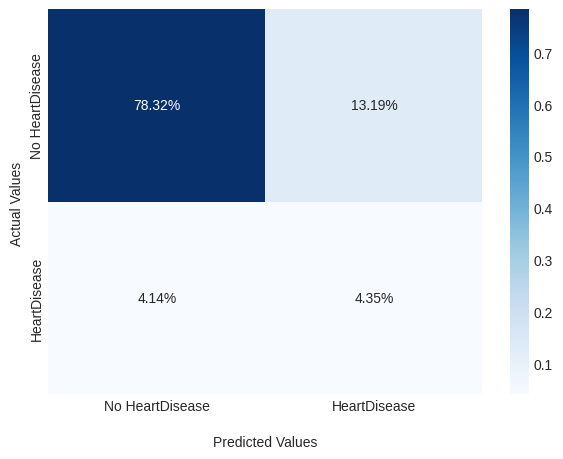

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     87796
           1       0.25      0.51      0.33      8143

    accuracy                           0.83     95939
   macro avg       0.60      0.68      0.62     95939
weighted avg       0.89      0.83      0.85     95939




**Xgboost Algorithem**

In [ ]:
# Pip 21.3+ is required
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# we define the f-beta score

fbeta_scorer = make_scorer(fbeta_score, beta=0.7)

In [ ]:
# Instance of estimator

classifier = XGBClassifier()

In [ ]:
pipeline = Pipeline([("mapper", mapper),
                     ("pipeline", Pipeline_imb([
                                                ("sampler", SMOTE()),
                                                ("under" , RandomUnderSampler()),
                                                ("classifier", classifier)
                                               ])) ])

gs=GridSearchCV(pipeline, {'pipeline__sampler__sampling_strategy':[0.4,0.45],
                           'pipeline__under__sampling_strategy':[0.5,0.45],
                           'pipeline__classifier__max_depth':[22,25]} ,cv=my_cv, scoring=fbeta_scorer)

gs.fit(X_train,y_train)
cv_res = gs.cv_results_['mean_test_score']


# Choosing the optimal estimator

model_XGB = gs.best_estimator_

# best parameters

param= gs.best_params_

# Predicting for test group

y_test_pred = pd.DataFrame(model_XGB.predict(X_test))
fbeta_res_test = fbeta_score(y_true=y_test, y_pred=y_test_pred,beta=0.7)

# Predicting for train group

y_train_pred = pd.DataFrame(model_XGB.predict(X_train))
fbeta_res_train=fbeta_score(y_true=y_train, y_pred=y_train_pred,beta=0.7)

#-------------------------------------------------------------

print(f" Chosen parameters : {param} \n CV results are : {cv_res} \n train score is : {fbeta_res_train} \n test score is :{fbeta_res_test}")

 Chosen parameters : {'pipeline__classifier__max_depth': 22, 'pipeline__sampler__sampling_strategy': 0.4, 'pipeline__under__sampling_strategy': 0.5} 
 CV results are : [0.23213873 0.21829796 0.21886602 0.20320472 0.22987665 0.21564808
 0.21573813 0.2012008 ] 
 train score is : 0.8412425169415313 
 test score is :0.23240387721018335


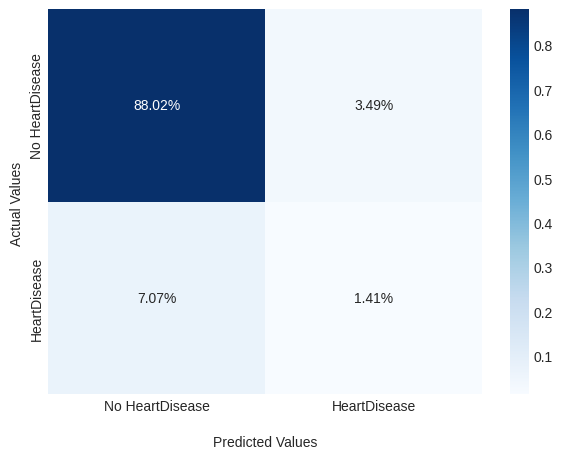

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     87796
           1       0.29      0.17      0.21      8143

    accuracy                           0.89     95939
   macro avg       0.61      0.56      0.58     95939
weighted avg       0.87      0.89      0.88     95939



**Logistic Regression**

Feature Selection -

As we have only 18 features, we did an feature importance process manually, in accordance to the condition that the feature is monotonic relative to the target.

In [ ]:
# Feature selection - Train

X_train_lr = X_train[['Smoking','AgeCategory','DiffWalking','KidneyDisease','SkinCancer',\
                'Stroke','Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)']]

In [ ]:
# Reducing dimenssions - Test
X_test_lr = X_test[['Smoking','AgeCategory','DiffWalking','KidneyDisease','SkinCancer',\
                'Stroke','Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)']]

In [ ]:
# Adjusted Pipeline after feature selection

p3 = Pipeline([('numeric',cols_selector(['AgeCategory'])), ('mms', MinMaxScaler())])
p4 = Pipeline([('cat',cols_selector(['Smoking','Stroke','DiffWalking'\
                   ,'KidneyDisease','SkinCancer'])), ('cattrans', cat_group(d))])

mapper = FeatureUnion([('p3',p3),('p4',p4)])

In [ ]:
# Instance of the estimator

classifier = LogisticRegression(class_weight='balanced')

In [ ]:
# Choosing croos validation technique

# my_cv=StratifiedShuffleSplit(n_split=5, train_size=0.7,test_size=0.3)

! -  As we know we didn't apply the Gridsearch on the estimator hyper-parametres as the defult option is good enough, but we did apply it on the SMOTE algorithem.

In [ ]:
pipeline = Pipeline([("mapper", mapper),
                     ("pipeline", Pipeline_imb([
                                                ("sampler", SMOTE()),
                                                ("under" , RandomUnderSampler()),
                                                ("classifier", classifier)
                                               ])) ])

gs=GridSearchCV(pipeline, {'pipeline__sampler__sampling_strategy':[0.2,0.4],
                           'pipeline__under__sampling_strategy':[0.5,0.45]} ,cv=my_cv, scoring=fbeta_scorer)

gs.fit(X_train,y_train)
cv_res = gs.cv_results_['mean_test_score']


# Choosing the optimal estimator

model_LR = gs.best_estimator_

# best parameters

param= gs.best_params_

# Predicting for test group

y_test_pred = pd.DataFrame(model_LR.predict(X_test))
fbeta_res_test = fbeta_score(y_true=y_test, y_pred=y_test_pred,beta=0.7)

# Predicting for train group

y_train_pred = pd.DataFrame(model_LR.predict(X_train))
fbeta_res_train=fbeta_score(y_true=y_train, y_pred=y_train_pred,beta=0.7)

#-------------------------------------------------------------

print(f" Chosen parameters : {param} \n CV results are : {cv_res} \n train score is : {fbeta_res_train} \n test score is :{fbeta_res_test}")

 Chosen parameters : {'pipeline__sampler__sampling_strategy': 0.4, 'pipeline__under__sampling_strategy': 0.45} 
 CV results are : [0.25942035 0.25940219 0.25943357 0.2594372 ] 
 train score is : 0.26011292955682136 
 test score is :0.2593004150100057


In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     87796
           1       0.20      0.74      0.31      8143

    accuracy                           0.72     95939
   macro avg       0.58      0.73      0.57     95939
weighted avg       0.90      0.72      0.78     95939



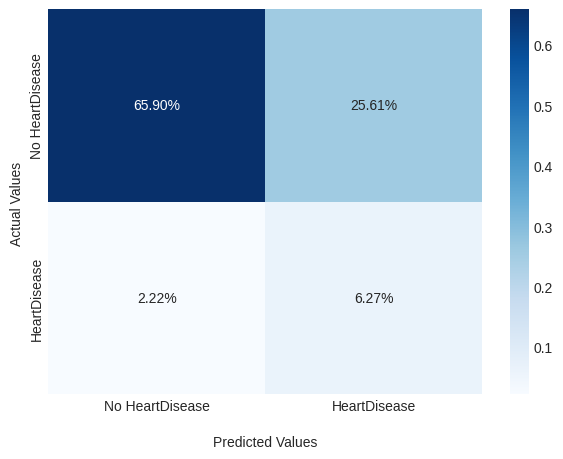

In [ ]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

**Decision tree Algorithem**

In [ ]:
def visualize_tree(model, md=5, width=800):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md, label='none')
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    return Image(graph.create_png(), width=width)

In [ ]:
def print_dot_text(model, md=5):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    dot_text = dot_data.getvalue()
    print(dot_text)

In [ ]:
# Instance of the estimator

classifier = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
# Choosing croos validation technique

my_cv=StratifiedShuffleSplit(n_splits=3, train_size=0.7,test_size=0.3)

In [ ]:
fbeta_scorer = make_scorer(fbeta_score, beta=0.7)

In [ ]:
pipeline = Pipeline([("mapper", mapper),
                     ("pipeline", Pipeline_imb([
                                                ("sampler", SMOTE()),
                                                ("under" , RandomUnderSampler()),
                                                ("classifier", classifier)
                                               ])) ])

gs=GridSearchCV(pipeline, {'pipeline__sampler__sampling_strategy':[0.3,0.4],
                           'pipeline__under__sampling_strategy':[0.5,0.45],
                           'pipeline__classifier__max_depth':[30,40],
                          'pipeline__classifier__min_samples_split':[100,80],
                           'pipeline__classifier__max_features':['sqrt','log2']} ,cv=my_cv, scoring=fbeta_scorer)

gs.fit(X_train,y_train)
cv_res = gs.cv_results_['mean_test_score']


# Choosing the optimal estimator

model_DT = gs.best_estimator_

# best parameters

param= gs.best_params_

# Predicting for test group

y_test_pred = pd.DataFrame(model_DT.predict(X_test))
fbeta_res_test = fbeta_score(y_true=y_test, y_pred=y_test_pred,beta=0.7)

# Predicting for train group

y_train_pred = pd.DataFrame(model_DT.predict(X_train))
fbeta_res_train=fbeta_score(y_true=y_train, y_pred=y_train_pred,beta=0.7)

#-------------------------------------------------------------

print(f" Chosen parameters : {param} \n CV results are : {cv_res} \n train score is : {fbeta_res_train} \n test score is :{fbeta_res_test}")

 Chosen parameters : {'pipeline__classifier__max_depth': 40, 'pipeline__classifier__max_features': 'sqrt', 'pipeline__classifier__min_samples_split': 80, 'pipeline__sampler__sampling_strategy': 0.3, 'pipeline__under__sampling_strategy': 0.45} 
 CV results are : [0.25103457 0.24872516 0.25474311 0.25106905 0.25150294 0.25446085
 0.25094524 0.2506699  0.25252436 0.24751698 0.25263223 0.24816724
 0.25064143 0.2448826  0.25223541 0.25523221 0.25002725 0.25159357
 0.25422498 0.25480137 0.25184465 0.25605291 0.25416619 0.25089313
 0.25444249 0.25166854 0.25007464 0.25144124 0.25256893 0.25108187
 0.25390641 0.25493121] 
 train score is : 0.24650080382397635 
 test score is :0.24551813311638432


In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     87796
           1       0.18      0.78      0.30      8143

    accuracy                           0.69     95939
   macro avg       0.58      0.73      0.55     95939
weighted avg       0.90      0.69      0.76     95939



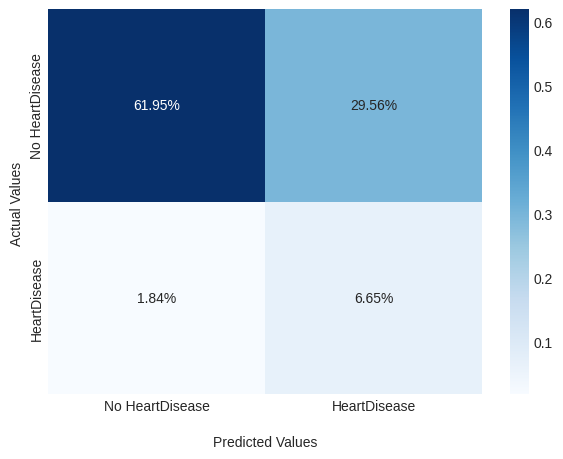

In [ ]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

**ROC Score and AUC**

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(ax, model, X_test, y_test, label,coloroc='red'):
    #ROC-AUC
    #predict Probabilities
    y_score_model = model.predict_proba(X_test) # results are probabilities for each sample for each class
    yes_probs = y_score_model[:,1] # retrieve the probabilities only for the class1 (yes, positve class)

    # calculate the features of ROC curve
    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs) # false positive, true posistive, threshold

    # AUC
    auc_model = auc(fpr_model, tpr_model)

    # Plot the ROC Curve
    label = f'{label} (auc={auc_model:.3f})'
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color=coloroc)

    # X-axis label
    ax.set_xlabel("False Positive Rate")

    # Y-axis label
    ax.set_ylabel("True Positive Rate")

    # show the legend
    ax.legend()


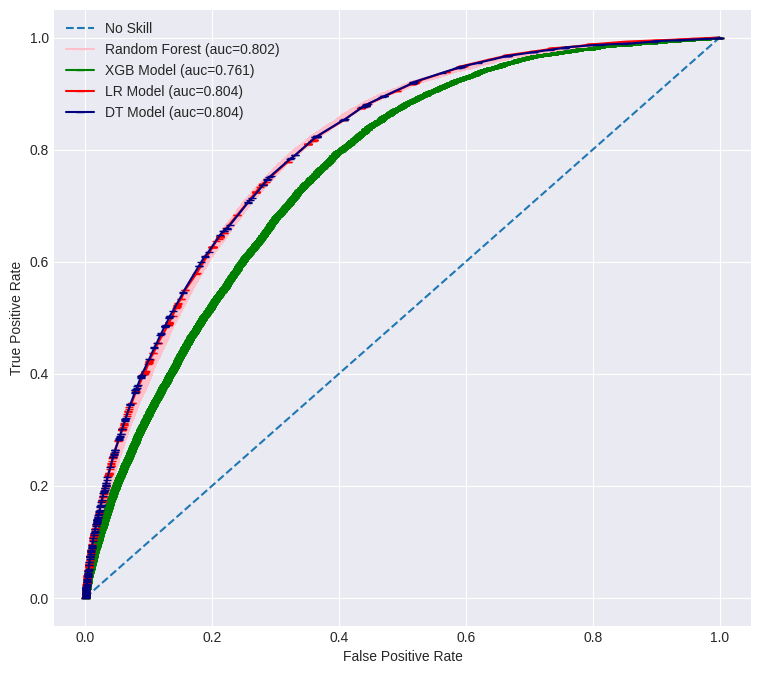

In [ ]:
fig = plt.figure(figsize=(9, 8))
ax = fig.gca()
# plot "No-Skill" on ROC Curve
ax.plot([0,1],[0,1], linestyle='--', label='No Skill')
plot_roc_auc(ax, model_RM, X_test, y_test, label='Random Forest',coloroc='pink')
plot_roc_auc(ax, model_XGB, X_test, y_test, label='XGB Model',coloroc='green')
plot_roc_auc(ax, model_LR, X_test, y_test, label='LR Model')
plot_roc_auc(ax, model_DT, X_test, y_test, label='DT Model',coloroc = "navy")
plt.show()

# **Conclusion**

As we can see from the ROC curve the AUC of the decision tree and Random forest is the same, but if we count the Fbeta score, **we can say that from all options, Random forest delivered the best results.**